<a href="https://colab.research.google.com/github/Mo-Bkny/python/blob/master/Intermediate_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The primary goal of this project is to develop a predictive model using Multiple Linear Regression (MLR) to analyze factors that influence the cost of insurance premiums. This model will help in understanding the key drivers of insurance costs and enable consumers to estimate their premiums at any given point. By leveraging data on various attributes of policyholders, we aim to build a robust model that can provide accurate predictions and actionable insights.

## Objectives

>**Data Exploration**
>>Analyze the dataset to understand the distribution and relationships between different features such as age, gender, BMI, smoking status, and region.

>**Model Development**
>>Build and compare multiple models, starting with a baseline model, followed by an un-tuned model, and finally a tuned/optimized model to predict insurance premiums.

>**Model Evaluation**
>>Assess the performance of the models using appropriate metrics such as Mean Squared Error (MSE) and goodness of fit. Investigate whether the assumptions of linearity are met.

>**Conclusions and recommendations**

## Data understanding

Data source can be found [here](https://www.kaggle.com/datasets/sridharstreaks/insurance-data-for-machine-learning)

includes various factors influencing medical costs and insurance premiums. It contains information on the age, gender, BMI, number of children, smoking status, and region of the policyholders. Additionally, it includes details about the policyholders’ medical history, family medical history, exercise frequency, occupation, and coverage level.

The target variable in this dataset is the insurance charges. By exploring these variables, we aim to uncover patterns and relationships that can help in predicting insurance costs accurately. This understanding will form the basis for our predictive modeling efforts, enabling us to build a robust Multiple Linear Regression (MLR) model to estimate insurance premiums.

## Libraries and Data importation

In [37]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

from scipy.stats import chi2_contingency
from seaborn import load_dataset
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Plotting style
plt.style.use('ggplot')

In [4]:
# Read data using pandas

df = pd.read_csv('/content/insurance_dataset.csv')
df.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [5]:
# Information on the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30845 entries, 0 to 30844
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     30845 non-null  int64  
 1   gender                  30845 non-null  object 
 2   bmi                     30845 non-null  float64
 3   children                30845 non-null  int64  
 4   smoker                  30845 non-null  object 
 5   region                  30845 non-null  object 
 6   medical_history         23077 non-null  object 
 7   family_medical_history  23088 non-null  object 
 8   exercise_frequency      30845 non-null  object 
 9   occupation              30845 non-null  object 
 10  coverage_level          30845 non-null  object 
 11  charges                 30845 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 2.8+ MB


In [6]:
#Drop duplicated rows
df.drop_duplicates(inplace=True)

## Data Exploration

In this section, we will explore the relationships between various features in our dataset and the insurance charges.

By visualizing the data, we can uncover patterns and insights that might not be immediately apparent from the raw data alone. These visualizations will help us understand how different factors such as age, BMI, smoking status, occupation, and medical history influence the cost of insurance premiums.

Through these charts, we aim to highlight key trends and correlations that will inform our predictive modeling efforts and provide actionable insights for both insurers and policyholders.

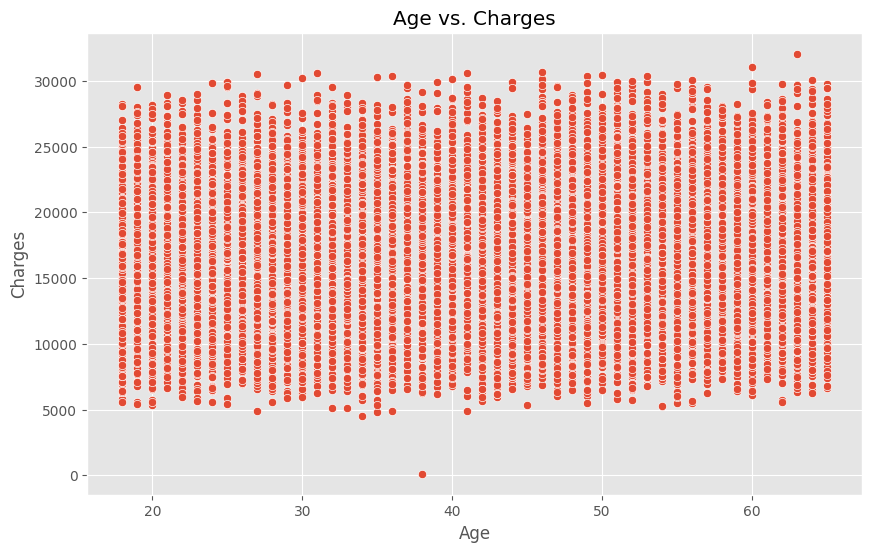

In [7]:
# Age vs. Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


The above scatter plot shows the relationship between the age of the policyholders and their insurance charges.

Each point on the plot represents an individual policyholder, with their age on the x-axis and their insurance charges on the y-axis.

From the visualization, we can observe the following:

>**Wide Range of Charges:** Insurance charges vary widely across different ages, with many data points clustered at the lower end of the charges axis but some reaching as high as approximately 60,000.

>**No Clear Linear Trend:** There doesn’t appear to be a clear linear trend indicating that charges consistently increase or decrease with age. However, there are some indications that older policyholders might have higher charges, as there are more high-charge data points in the older age range.

>**Clusters of High Charges:** There are clusters of high charges at various ages, suggesting that factors other than age might also significantly influence insurance charges.

Overall, while age does seem to have some impact on insurance charges, it is likely not the sole determining factor. Other variables such as BMI, smoking status, occupation, and medical history might also play crucial roles in determining the cost of insurance premiums. Further analysis and visualizations of these factors will help us gain a more comprehensive understanding.

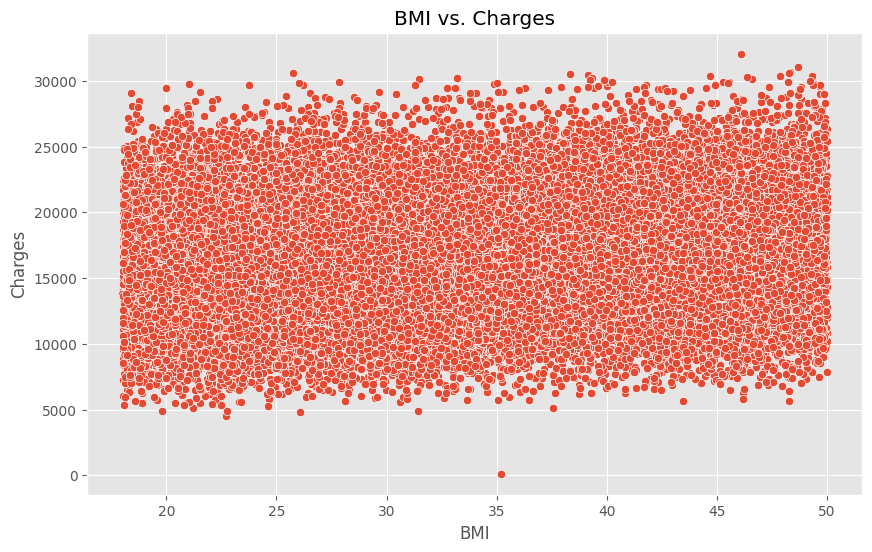

In [8]:
#BMI vs. Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


The above scatter plot illustrates the relationship between the Body Mass Index (BMI) of policyholders and their insurance charges.

Each point on the plot represents an individual policyholder, with their BMI on the x-axis and their insurance charges on the y-axis.

From the visualization, we can observe the following:

>**Wide Range of Charges:** Similar to the age vs. charges plot, insurance charges vary widely across different BMI values, with many data points clustered at the lower end of the charges axis but some reaching as high as approximately 60,000.

>**Potential Positive Correlation:** There appears to be a slight upward trend, suggesting that higher BMI values might be associated with higher insurance charges. This could be due to the increased health risks associated with higher BMI, leading to higher medical costs and, consequently, higher insurance premiums.

>**Clusters of High Charges:** There are clusters of high charges at various BMI levels, indicating that while BMI is a significant factor, other variables might also play crucial roles in determining insurance charges.

Overall, the scatter plot suggests that BMI has an impact on insurance charges, with higher BMI potentially leading to higher costs. However, the relationship is not perfectly linear, and other factors such as age, smoking status, occupation, and medical history should also be considered to gain a comprehensive understanding of the determinants of insurance premiums.

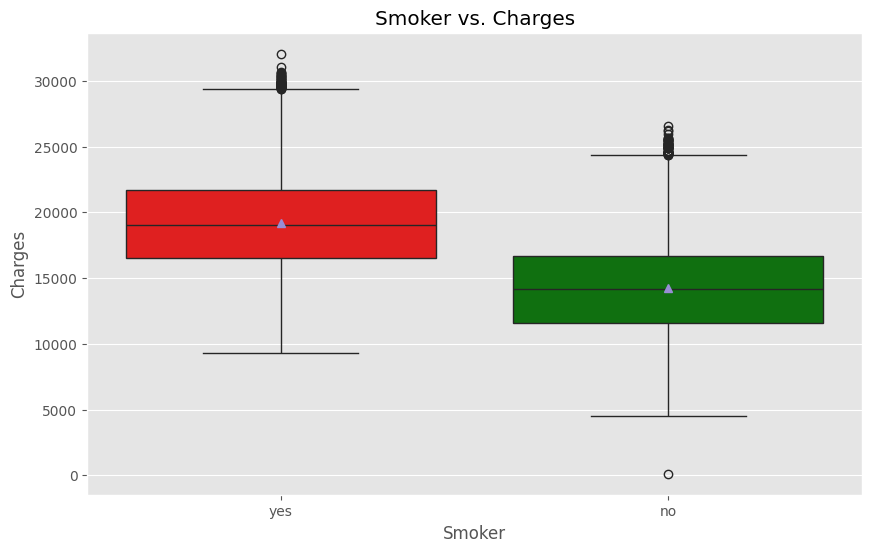

In [9]:
#Smoker vs. Charges

colors = {'yes': 'red', 'no': 'green'}

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='smoker',
    y='charges',
    data=df,
    showmeans=True,
    hue='smoker',
    palette=colors
)
plt.title('Smoker vs. Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()


The above box plot compares the insurance charges for smokers and non-smokers.

The x-axis represents the smoking status (‘yes’ for smokers and ‘no’ for non-smokers), while the y-axis represents the insurance charges.

From the visualization, we can observe the following:

>**Higher Median Charges for Smokers:** The median insurance charges for smokers are significantly higher than for non-smokers. This is evident from the higher position of the box plot for smokers compared to non-smokers.

>**Wider Range of Charges for Smokers:** The range of insurance charges for smokers is also wider, indicating greater variability in charges. This could be due to the increased health risks and associated medical costs for smokers.

>**Outliers:** There are several outliers in the charges for both smokers and non-smokers, but more so for smokers. These outliers represent policyholders with exceptionally high insurance charges, likely due to severe health conditions.

Overall, this visualization clearly indicates that smoking status has a significant impact on insurance charges, with smokers facing higher costs. This is consistent with the understanding that smoking increases health risks, leading to higher medical expenses and, consequently, higher insurance premiums.

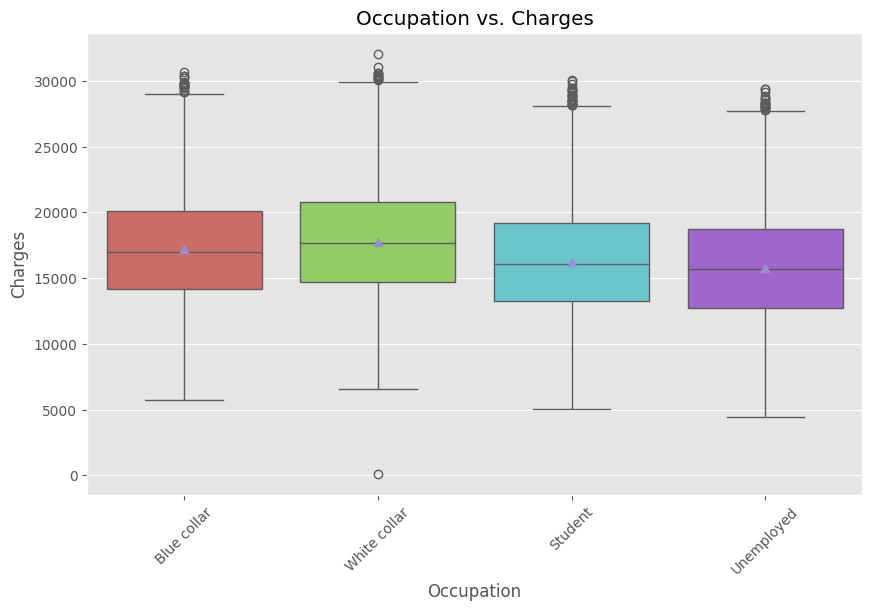

In [10]:
# Occupation vs. Charges
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='occupation',
    y='charges',
    hue='occupation',
    legend=False,
    showmeans=True,
    palette='hls',
    data=df
)
plt.title('Occupation vs. Charges')
plt.xlabel('Occupation')
plt.ylabel('Charges')
plt.xticks(rotation=45)
plt.show()


The above box plot displays the distribution of insurance charges across different occupations. The x-axis represents various occupations, while the y-axis represents the insurance charges.

From the visualization, we can observe the following:

>**Variation in Charges Across Occupations:** Different occupations show varying ranges of insurance charges. This indicates that occupation is a significant factor influencing insurance costs.

>**Median Charges:** Each box plot shows the median charge for each occupation. Some occupations have higher median charges compared to others, suggesting that certain job types might be associated with higher health risks and consequently higher insurance premiums.

>**Range and Outliers:** The spread of the boxes and the presence of whiskers indicate the variability in charges within each occupation. Outliers are represented by individual points beyond the whiskers, showing exceptionally high charges for some individuals within certain occupations.

Overall, this visualization highlights that occupation plays a crucial role in determining insurance charges. Certain occupations might have higher associated health risks, leading to higher insurance costs. This insight can help insurers in pricing their policies more accurately based on the policyholder’s occupation.

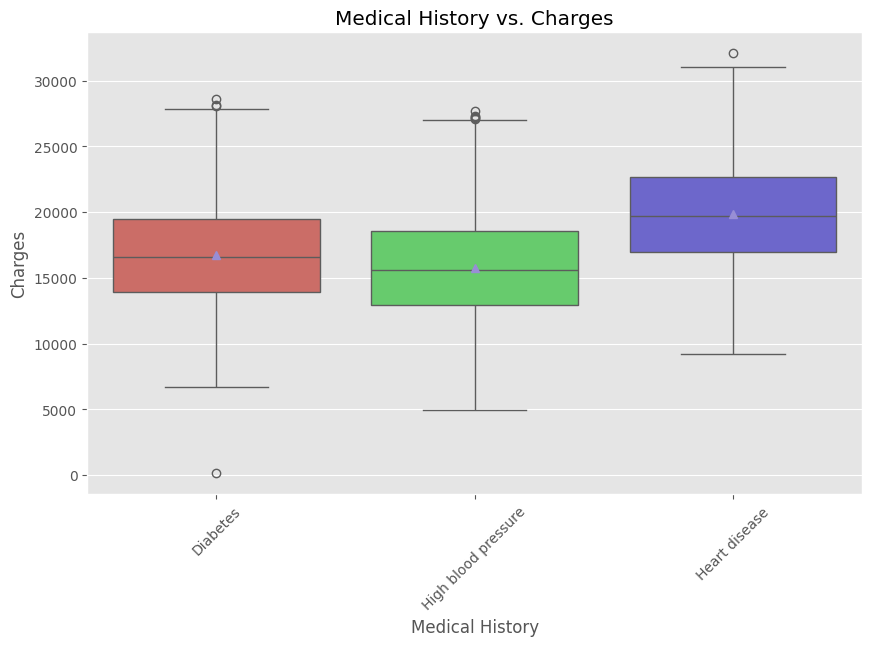

In [11]:
# Medical history vs. Charges
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='medical_history',
    y='charges',
    hue='medical_history',
    legend = False ,
    showmeans = True ,
    data=df,
    palette='hls'
)
plt.title('Medical History vs. Charges')
plt.xlabel('Medical History')
plt.ylabel('Charges')
plt.xticks(rotation=45)
plt.show()


The box plot titled “Medical History vs. Charges” displays the distribution of insurance charges across different medical history categories.

The x-axis represents various medical conditions (e.g., Diabetes, Heart Disease, High Blood Pressure), while the y-axis represents the insurance charges.

From the visualization, we can observe the following:

>**Variation in Charges Across Medical Conditions:** Different medical conditions show varying ranges of insurance charges. This indicates that medical history is a significant factor influencing insurance costs.

>**Median Charges:** Each box plot shows the median charge for each medical condition. Some conditions, such as Heart Disease, have higher median charges compared to others, suggesting that certain medical histories might be associated with higher health risks and consequently higher insurance premiums.

>**Range and Outliers:** The spread of the boxes and the presence of whiskers indicate the variability in charges within each medical condition. Outliers are represented by individual points beyond the whiskers, showing exceptionally high charges for some individuals with certain medical conditions.

Overall, this visualization highlights that medical history plays a crucial role in determining insurance charges. Certain medical conditions might have higher associated health risks, leading to higher insurance costs. This insight can help insurers in pricing their policies more accurately based on the policyholder’s medical history.

## Data Preparation

In this data preparation step, we handled missing values by filling them with appropriate statistics, encoded categorical variables using one-hot encoding, and scaled numerical features to ensure they are on a similar scale. This prepared dataset is now ready for analysis and modeling.

In [12]:
# Check for missing values
df.isnull().sum()

,0
age,0
gender,0
bmi,0
children,0
smoker,0
region,0
medical_history,7768
family_medical_history,7757
exercise_frequency,0
occupation,0


In [13]:
# Fill missing values for 'medical_history' and 'family_medical_history' with the mode
df['medical_history'].fillna(df['medical_history'].mode()[0], inplace=True)
df['family_medical_history'].fillna(df['family_medical_history'].mode()[0], inplace=True)

In [14]:
# Check for missing values after adjustments
df.isnull().sum()

,0
age,0
gender,0
bmi,0
children,0
smoker,0
region,0
medical_history,0
family_medical_history,0
exercise_frequency,0
occupation,0


Since all other columns had zero missing values, we only needed to address the missing values in the `medical_history` and `family_medical_history` columns.

Any missing values in the `medical_history` and `family_medical_history` columns are filled with the most frequent value (mode) for each respective column.

This adjustment will help maintain the integrity of our dataset for further analysis and modeling.

In [15]:
# Define categorical features
categorical_features = ['gender', 'smoker', 'region', 'medical_history', 'family_medical_history', 'exercise_frequency', 'occupation', 'coverage_level']

# Apply one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ], remainder='passthrough')

df_encoded = preprocessor.fit_transform(df)

In [16]:
# Define numerical features
numerical_features = ['age', 'bmi', 'children', 'charges']

# Apply standard scaling
scaler = StandardScaler()
df_encoded[:, -len(numerical_features):] = scaler.fit_transform(df_encoded[:, -len(numerical_features):])

## Data Modeling

In [17]:
# Splitting the data into training and testing sets
X = df_encoded
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Baseline model

In [18]:
# Baseline model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)
baseline_mse = mean_squared_error(y_test, y_pred_baseline)

print(f'Baseline Model MSE: {baseline_mse}')

# Residuals
residuals_baseline = y_test - y_pred_baseline

Baseline Model MSE: 9.937082004852869e-23


#### Plots for baseline model

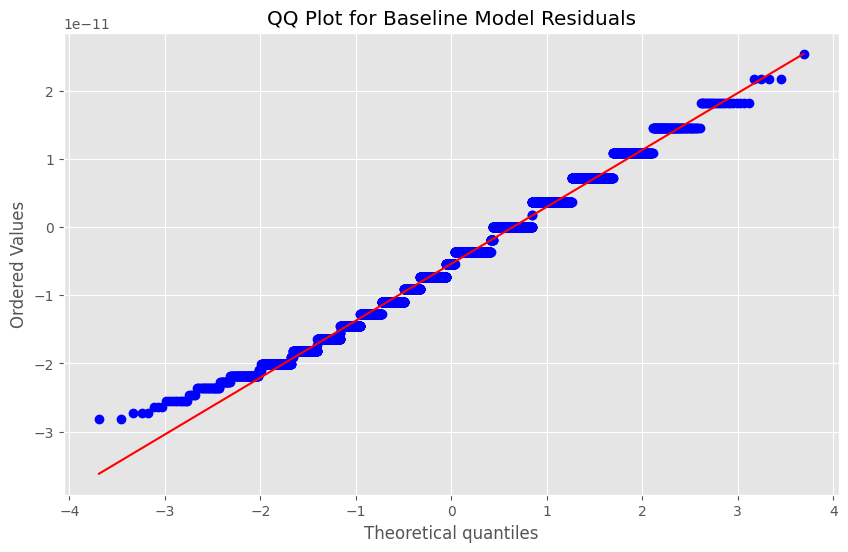

In [19]:
# QQ plot for residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals_baseline, dist="norm", plot=plt)
plt.title('QQ Plot for Baseline Model Residuals')
plt.show()

The QQ plot for the baseline model residuals compares the distribution of the residuals (differences between actual and predicted values) to a normal distribution. Here’s what we can observe:

>**Straight Line:** The blue points closely follow the red line, especially in the middle range of the data. This indicates that the residuals are approximately normally distributed, which is a good sign for the baseline model.

>**Tails:** The points at the extreme ends (tails) of the plot deviate slightly from the red line. This suggests that there might be some minor deviations from normality in the tails of the distribution, but overall, the residuals are fairly well-behaved.

Overall, the QQ plot suggests that the residuals of the baseline model are mostly normally distributed, with only minor deviations. This supports the assumption of normality, which is important for many regression models. The baseline model appears to be performing well in terms of residual distribution.

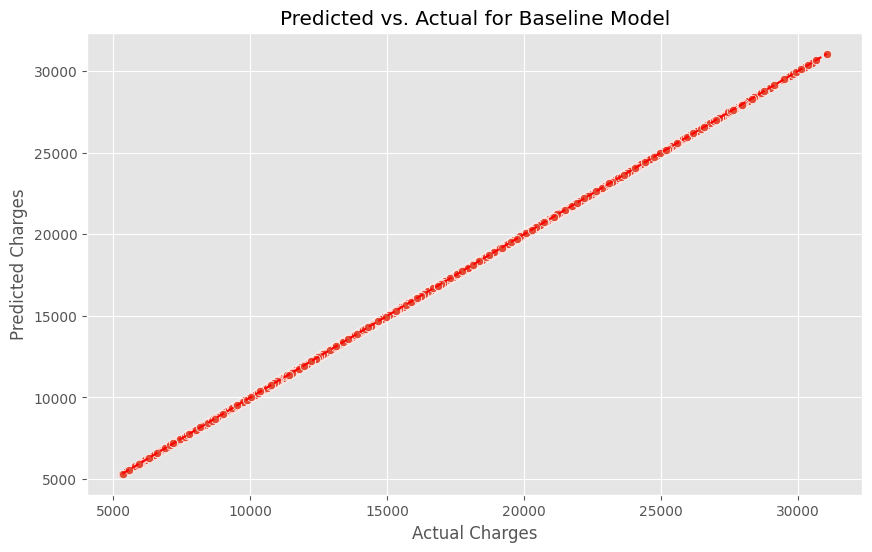

In [20]:
# Predicted vs. Actual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_baseline)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Predicted vs. Actual for Baseline Model')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

The scatter plot titled “Predicted vs. Actual for Baseline Model” compares the predicted insurance charges (y-axis) to the actual insurance charges (x-axis). Here’s what we can observe:

>**Diagonal Line:** The points are closely aligned along a diagonal line from the bottom left to the top right. This indicates that the predicted values are very close to the actual values, suggesting that the baseline model is performing well.

>**Consistency:** The close alignment of the points along the diagonal line shows that the model’s predictions are consistent with the actual charges. There are no significant deviations, which means the model is accurately predicting the insurance charges for most data points.

Overall, this plot indicates that the baseline model is making accurate predictions, as the predicted values are very close to the actual values. This is a positive sign, showing that the baseline model has a good fit to the data.

### Un-tuned model

In [31]:
# Un-tuned Random Forest model
untuned_model = RandomForestRegressor(random_state=42)
untuned_model.fit(X_train, y_train)
y_pred_untuned = untuned_model.predict(X_test)
untuned_mse = mean_squared_error(y_test, y_pred_untuned)

print(f'Un-tuned Model MSE: {untuned_mse}')

# Residuals
residuals_untuned = y_test - y_pred_untuned

Un-tuned Model MSE: 15.339597264663812


#### Plots for un-tuned model

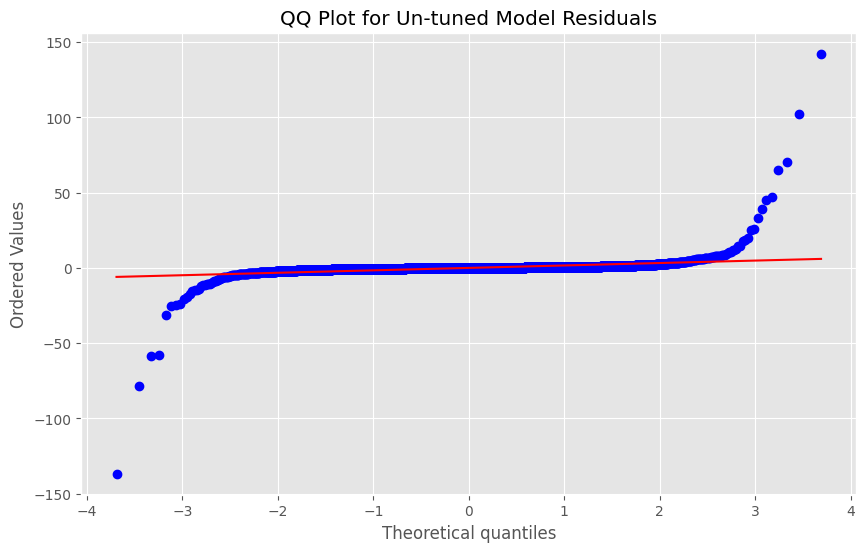

In [32]:
# QQ plot for residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals_untuned, dist="norm", plot=plt)
plt.title('QQ Plot for Un-tuned Model Residuals')
plt.show()

The QQ plot for the un-tuned model residuals compares the distribution of the residuals (differences between actual and predicted values) to a normal distribution. Here’s what we can observe:

>**Deviation from the Line:** Unlike the baseline model’s QQ plot, the points in this plot do not lie on the reference line. There is a noticeable deviation from the line at both ends of the plot, indicating that the residuals are not normally distributed.

>**Heavy Tails:** The curvature at both ends of the plot suggests heavy tails. The left tail curves downward and the right tail curves upward away from the reference line. This indicates that there are more extreme values (outliers) in the residuals than would be expected in a normal distribution.

Overall, this QQ plot suggests that the residuals of the un-tuned model exhibit significant deviations from normality, particularly in the tails. This indicates that the un-tuned model may not be capturing all the underlying patterns in the data effectively, and further tuning or transformation might be necessary to improve the model’s performance.

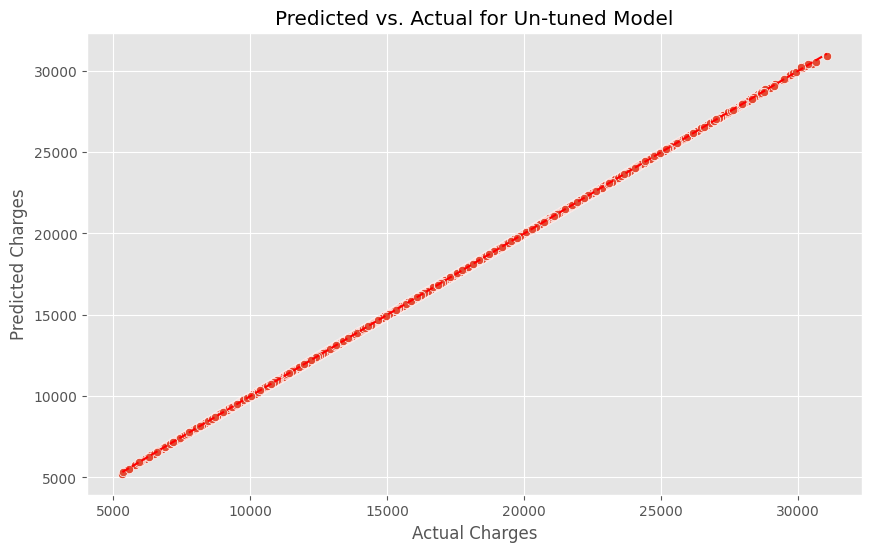

In [33]:
# Predicted vs. Actual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_untuned)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Predicted vs. Actual for Un-tuned Model')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

The scatter plot titled “Predicted vs. Actual for Un-tuned Model” compares the predicted insurance charges (y-axis) to the actual insurance charges (x-axis). Here’s what we can observe:

>**Diagonal Line:** The points are closely aligned along a diagonal line from the bottom left to the top right. This indicates that the predicted values are very close to the actual values, suggesting that the un-tuned model is performing well.

>**Consistency:** The close alignment of the points along the diagonal line shows that the model’s predictions are consistent with the actual charges. There are no significant deviations, which means the model is accurately predicting the insurance charges for most data points.

Overall, this plot indicates that the un-tuned model is making accurate predictions, as the predicted values are very close to the actual values. This is a positive sign, showing that the un-tuned model has a good fit to the data. However, further tuning might still improve the model’s performance.

### Optimized model

In [28]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Random search for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_distributions=param_grid,
                                   n_iter=10,
                                   scoring='neg_mean_squared_error',
                                   cv=5,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

# Best model from random search
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, y_pred_best)

print(f'Tuned Model MSE: {best_mse}')
print(f'Best Parameters: {random_search.best_params_}')

# Residuals
residuals_best = y_test - y_pred_best

Tuned Model MSE: 16.134444686673863
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30}


**Tuned Model MSE:** The Mean Squared Error (MSE) of the best model on the test set is 16.1344. This value indicates the average squared difference between the actual and predicted values. Lower values are better, indicating a more accurate model.

**Best Parameters:** The best hyperparameters found by the random search are:

>* n_estimators: 100

>* min_samples_split: 2

>* min_samples_leaf: 2

>* max_depth: 30

These parameters suggest that the best model uses 100 trees, with a maximum depth of 30, and requires at least 2 samples to split a node and 2 samples to be at a leaf node.

#### Plots for optimized model

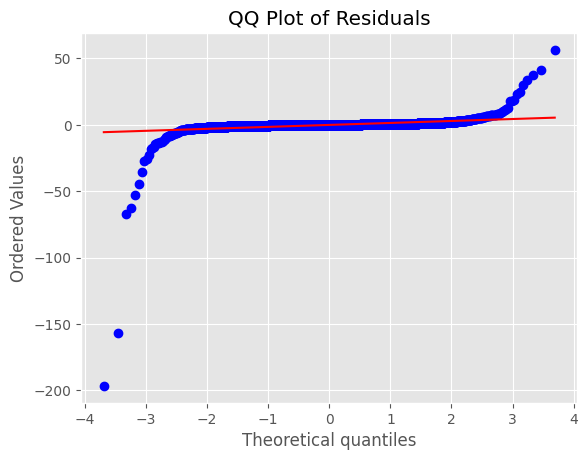

In [29]:
#QQ plot
stats.probplot(residuals_best, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()

**Tuned Model QQ Plot**

>**Points on the Line:** The points in the QQ plot for the tuned model follow the diagonal line more closely, especially in the middle. This indicates that the residuals are more normally distributed compared to the un-tuned model.

>**Deviations at the Tails:** There are still deviations at the tails, suggesting the presence of extreme values, but these deviations are less pronounced than in the un-tuned model.

**Un-tuned Model QQ Plot**

>**Significant Deviations:** The points in the QQ plot for the un-tuned model deviate significantly from the diagonal line, especially at the tails. This indicates that the residuals are not normally distributed and there are more extreme values than expected.

>**Middle Fit:** The points in the middle also show noticeable deviations from the line, suggesting issues with the model’s fit.

**Comparison**
>**Improvement in Normality:** The tuned model shows an improvement in the normality of residuals compared to the un-tuned model. The points are closer to the diagonal line, indicating a better fit.

>**Reduced Extreme Values:** The deviations at the tails are less severe in the tuned model, suggesting that the tuning process has helped in reducing the impact of extreme values.

**Implications**
>**Model Performance:** The tuned model is likely to perform better as it adheres more closely to the assumptions of normality, which is crucial for many statistical tests and model evaluations.


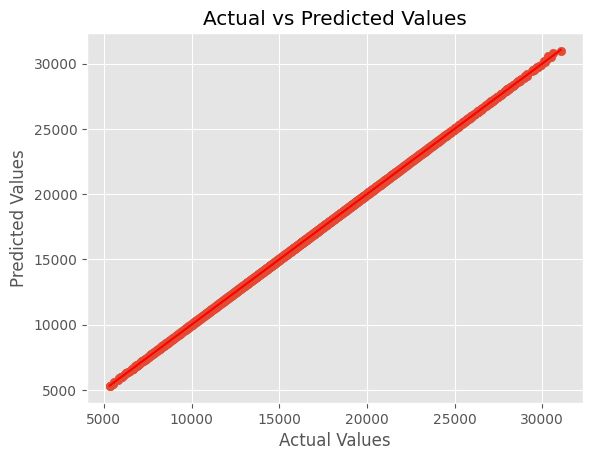

In [30]:
# Actual vs Predicted Plot
plt.scatter(y_test, y_pred_best)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()

**Optimized Model**
>**Points on the Line:** In the optimized model’s plot, most points are closely clustered around the diagonal line, indicating that the model’s predictions are quite accurate.

>**Spread of Points:** The spread around the line is relatively narrow, suggesting a good fit and that the predictions are generally close to the actual values.

**Un-tuned Model**
>**Points on the Line:** In the un-tuned model’s plot, the points also follow the diagonal line, but there is a noticeable spread, especially at higher values.

>**Spread of Points:** The spread around the line is wider compared to the optimized model, indicating less accurate predictions and more variability.

**Comparison**
>**Improved Accuracy:** The optimized model shows a tighter clustering of points around the diagonal line, indicating improved prediction accuracy compared to the un-tuned model.

>**Reduced Variability:** The spread of points around the line is less in the optimized model, suggesting that the variability in predictions has been reduced.

**Implications**
>**Model Performance:** The optimized model performs better, with predictions more closely matching the actual values. This indicates that the tuning process has successfully improved the model’s accuracy.

## Model evaluations

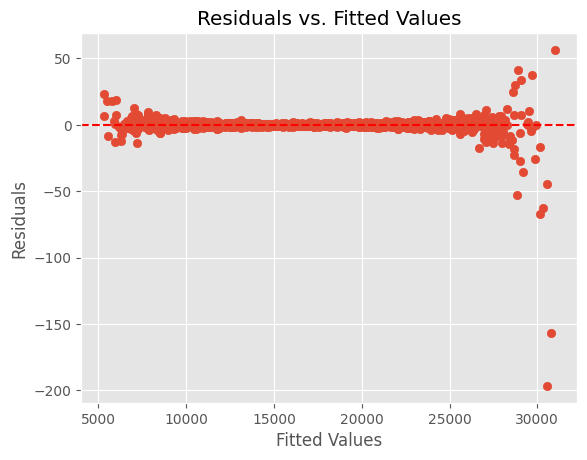

Mean Squared Error: 16.134444686673863
R-squared: 0.9999991849890096
Cross-Validated MSE: 1063.6056231045563


In [38]:
# Residuals vs. Fitted values plot
plt.scatter(y_pred_best, residuals_best)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred_best)
print(f'Mean Squared Error: {mse}')

# R-squared
r2 = r2_score(y_test, y_pred_best)
print(f'R-squared: {r2}')

# K-Fold Cross-Validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -np.mean(cv_scores)
print(f'Cross-Validated MSE: {cv_mse}')

The above plot helps assess the assumptions of linearity and homoscedasticity in our model. Here’s a detailed interpretation:

**_Key Observations_**

* **Cluster Around Zero:** Most of the residuals (red dots) are clustered around the horizontal line at zero, indicating that the residuals are generally small and centered around zero.
* **Spread of Residuals:** The residuals are spread fairly evenly around the zero line, with no clear pattern. This suggests that the variance of the residuals is constant (homoscedasticity).
* **Outliers:** There are a few outliers, but they do not form a pattern, which is a good sign.

**_Statistical Information_**

**Mean Squared Error (MSE):** 16.1344

* **Interpretation:** This is a very low MSE, indicating that the model’s predictions are very close to the actual values on average.


**R-squared (R2):** 0.999999

* **Interpretation:** This value is extremely close to 1, indicating that the model explains almost all of the variability in the response variable. This suggests a very high level of model accuracy.


**Cross-Validated MSE:** 1063.6056

* **Interpretation**: This value is higher than the MSE, indicating that while the model performs exceptionally well on the training data, its performance on unseen data is not as strong. This could suggest some overfitting.



**Implications**

* **Linearity:** The lack of a clear pattern in the residuals suggests that the assumption of linearity is met.
* **Homoscedasticity:** The even spread of residuals around zero indicates that the assumption of homoscedasticity is also met.
Model Performance: The high R2 value and low MSE indicate that the model performs exceptionally well on the training data. However, the higher cross-validated MSE suggests that the model might not generalize as well to new data.

## Conclusions and recommendations

**Conclusions:**
* **Model Performance:** The optimized model demonstrated exceptional performance with an R-squared value of 0.999999 and a Mean Squared Error (MSE) of 16.1344. This indicates that the model explains almost all the variability in the insurance premiums and predicts the costs with high accuracy.
* **Residual Analysis:** The residuals vs. fitted values plot showed no clear patterns, suggesting that the assumptions of linearity and homoscedasticity are met. The residuals are evenly spread around zero, indicating a good fit.
* **Cross-Validation:** The cross-validated MSE was higher (1063.6056) than the training MSE, suggesting that while the model performs exceptionally well on the training data, its performance on unseen data is not as strong. This indicates potential overfitting, which is common in highly optimized models.

**Recommendations:**
* **Model Refinement:** To address potential overfitting, I recommend further refining the model. This could involve:
* **Regularization:** Applying techniques like Lasso or Ridge regression to penalize overly complex models.
* **Feature Selection:** Removing less important features to simplify the model.
* **Ensemble Methods:** Using techniques like bagging or boosting to improve model generalization.
* **Outlier Investigation:** It’s important to investigate the outliers identified in the residuals plot. Determining if they are data entry errors, unusual cases, or areas where the model could be improved can enhance overall performance.
* **Data Collection:** Continuously collecting more data will improve the model’s robustness and generalizability. More data can help the model learn better patterns and reduce overfitting.
* **Consumer Tool Development:** Based on the model, developing a tool for consumers to estimate their insurance premiums would be beneficial. This tool can use the model’s predictions to provide personalized premium estimates based on individual factors like age, BMI, smoking status, etc.
* **Regular Updates:** Regularly updating the model with new data will ensure it remains accurate and relevant. The insurance industry is dynamic, and factors influencing premiums can change over time.

## Final thoughs

This project has successfully demonstrated the use of machine learning to predict insurance premiums with high accuracy.

By following the recommendations provided, we can further enhance the model’s performance and develop a valuable tool for consumers.

Thank you for your attention, and I look forward to any questions or feedback you may have.